In [1]:
import sys
sys.path.append('..')

import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.datasets import make_blobs

plt.style.use('astroLuSt.styles.LuSt_style')


from astroLuSt.visualization import plots as alvp

# Parallel Coordinate Plot

Generate a dummy dataset

In [437]:
nsamples = 100

id = np.random.choice(['A', 'B', 'C', 'D'], size=(nsamples,1))
x1 = np.random.rand(*(nsamples,1))
x2 = np.random.randint(50, 10000, (nsamples,1), dtype=int)
x3 = np.random.choice(['a', 'relu', 'sigmoid', 'tanh', np.nan], size=(nsamples,1))
x4 = np.random.randint(-2, 8, (nsamples,1), dtype=int).astype(float)
score = np.random.uniform(0, 100, (nsamples,1))
score[:2]   = np.nan
score[2:3]  = np.inf
score[3:4]  = -np.inf
score[5:7]  = 0
score[7:10] = -1
x4[8]       = np.nan
# score = np.random.uniform(0.3, 0.8, (nsamples,1))
X = {
    '#':id.flatten(),
    'x1':x1.flatten(),
    'x2':x2.flatten(),
    'x3':x3.flatten(),
    'x4':x4.flatten(),
    'score':score.flatten(),
    # 'acc':score.flatten(),
}

df = pl.DataFrame(data=X)
print(df)

df_np = df.select(pl.col(['x2', 'x1', 'x3', 'x4', 'score'])).to_numpy()

print(df_np)


shape: (100, 6)
┌─────┬──────────┬──────┬──────┬──────┬───────────┐
│ #   ┆ x1       ┆ x2   ┆ x3   ┆ x4   ┆ score     │
│ --- ┆ ---      ┆ ---  ┆ ---  ┆ ---  ┆ ---       │
│ str ┆ f64      ┆ i64  ┆ str  ┆ f64  ┆ f64       │
╞═════╪══════════╪══════╪══════╪══════╪═══════════╡
│ B   ┆ 0.322921 ┆ 5538 ┆ tanh ┆ 6.0  ┆ NaN       │
│ D   ┆ 0.335525 ┆ 7802 ┆ relu ┆ 7.0  ┆ NaN       │
│ A   ┆ 0.447268 ┆ 9158 ┆ tanh ┆ 3.0  ┆ inf       │
│ C   ┆ 0.433543 ┆ 1194 ┆ a    ┆ 5.0  ┆ -inf      │
│ …   ┆ …        ┆ …    ┆ …    ┆ …    ┆ …         │
│ B   ┆ 0.275565 ┆ 2990 ┆ nan  ┆ 7.0  ┆ 33.379219 │
│ D   ┆ 0.275096 ┆ 1117 ┆ relu ┆ 6.0  ┆ 37.184534 │
│ A   ┆ 0.811642 ┆ 5916 ┆ tanh ┆ -2.0 ┆ 62.089963 │
│ D   ┆ 0.824491 ┆ 9086 ┆ a    ┆ 1.0  ┆ 49.16344  │
└─────┴──────────┴──────┴──────┴──────┴───────────┘
[[5538 0.3229212003214813 'tanh' 6.0 nan]
 [7802 0.3355247747042217 'relu' 7.0 nan]
 [9158 0.4472682559289691 'tanh' 3.0 inf]
 [1194 0.4335426701392524 'a' 5.0 -inf]
 [2171 0.5114273107281726 'relu' 7.0 3

Let's look at the different features/coordinates

{'a': 0, 'relu': 2, 'sigmoid': 3, 'tanh': 4}
(0.0, 5.0)
(-197.85000000000002, 10426.9425)
(100, 5)
[ 284.          436.96825397  589.93650794  742.9047619   895.87301587
 1048.84126984 1201.80952381 1354.77777778 1507.74603175 1660.71428571
 1813.68253968 1966.65079365 2119.61904762 2272.58730159 2425.55555556
 2578.52380952 2731.49206349 2884.46031746 3037.42857143 3190.3968254
 3343.36507937 3496.33333333 3649.3015873  3802.26984127 3955.23809524
 4108.20634921 4261.17460317 4414.14285714 4567.11111111 4720.07936508
 4873.04761905 5026.01587302 5178.98412698 5331.95238095 5484.92063492
 5637.88888889 5790.85714286 5943.82539683 6096.79365079 6249.76190476
 6402.73015873 6555.6984127  6708.66666667 6861.63492063 7014.6031746
 7167.57142857 7320.53968254 7473.50793651 7626.47619048 7779.44444444
 7932.41269841 8085.38095238 8238.34920635 8391.31746032 8544.28571429
 8697.25396825 8850.22222222 9003.19047619 9156.15873016 9309.12698413
 9462.0952381  9615.06349206 9768.03174603 9921.   

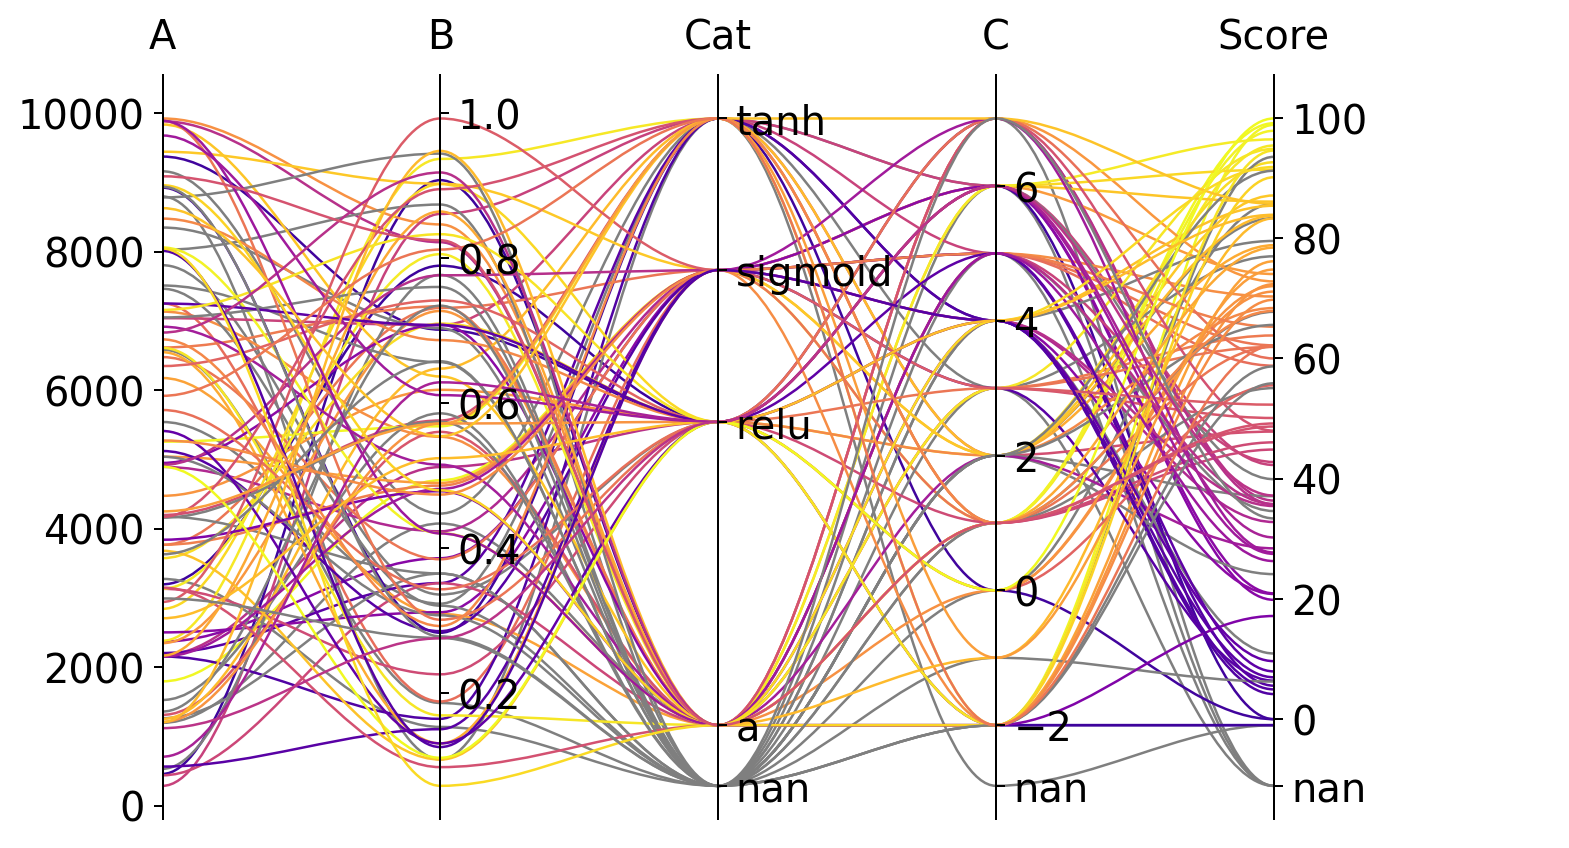

In [438]:
importlib.reload(alvp)


PC = alvp.ParallelCoordinates(
    show_idcol=True,
    interpkind='quadratic',
    # interpkind=1,
    res=100,
    axpos_coord=None, axpos_hist=None,
    map_suffix='__map__',
    ticks2display=5, tickcolor='tab:grey', ticklabelrotation=45, tickformat='%g',
    nancolor='tab:grey', nanfrac=4/256,
    linealpha=1, linewidth=1,
    base_cmap='plasma', cbar_over_hist=False,
    n_jobs=6, n_jobs_addaxes=1, sleep=0.0,
    verbose=1,
    text_kwargs=None,    
)
# print(PC)
# fig, axs = PC.plot(
#     coordinates=df,
#     id_col='#',
#     score_col='score',
#     # score_col='acc',
#     coords_cols=r'^.*$',
#     min_score=None, max_score=None, remove_nanscore=False,
#     # score_scaling='np.log10(pl.col(score_col))',
#     score_scaling='pl.col(score_col)',
#     show_idcol=None,
#     interpkind=None,
#     res=None,
#     axpos_coord=None, axpos_hist=None,
#     ticks2display=None, tickcolor=None, ticklabelrotation=None, tickformat=None,
#     # coordinate_labs=['0', '1', '2', '3', '4'],
#     nancolor=None, nanfrac=None,
#     linealpha=None, linewidth=None,
#     base_cmap=None, cbar_over_hist=None,
#     n_jobs=None, n_jobs_addaxes=None, sleep=None,
#     map_suffix=None,
#     save=False,
#     max_nretries=4,
#     verbose=None,
#     text_kwargs=None, fig_kwargs={'figsize':(30,9)}, save_kwargs=None,
# )

fig, axs = PC.plot(
    df_np,
    coordnames=['A', 'B', 'Cat', 'C', 'Score'],
    pathpatch_kwargs=None,
    y_margin=0.05
)

fig.tight_layout()

plt.show()

Also works with np.ndarrays, if they are not of dtype object

In [15]:
fig, axs = PC.plot(
    coordinates=df_np,
    id_col=0,
    score_col=-1,
    coords_cols=r'^.*$',
    min_score=None, max_score=None, remove_nanscore=True,
    score_scaling='np.log10(pl.col(score_col))',
    show_idcol=None,
    interpkind=None,
    res=None,
    axpos_coord=None, axpos_hist=None,
    ticks2display=None, tickcolor=None, ticklabelrotation=None, tickformat=None,
    nancolor=None, nanfrac=None,
    linealpha=None, linewidth=None,
    base_cmap=None, cbar_over_hist=None,
    n_jobs=None, n_jobs_addaxes=None, sleep=None,
    map_suffix=None,
    save=False,
    max_nretries=4,
    verbose=None,
    text_kwargs=None, fig_kwargs={'figsize':(30,9)}, save_kwargs=None,
)

plt.show()

INFO(ParallelCoordinates): Removed
    0 row(s) via (-inf < column_2 < inf),
    0 row(s) containig nans,
    0 row(s) total.

INFO(ParallelCoordinates): Removed
    0 row(s) where column_2 evaluated to inf or -inf due to "score_scaling",



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# LatentSpaceExplorer

Generate a dummy dataset

In [16]:
class UnravelLatentspace:
    """
        - Generator Class to create polynomials
    """
    def __init__(self) -> None:
        pass

    def predict(self, X_latent:np.ndarray, y=None):

        x = np.linspace(0,1,100)
        X  = np.array([np.polyval(xl, x) for xl in X_latent])

        return X

X_latent, y = make_blobs(n_samples=100, n_features=4, centers=4)


Look at latent dimensions and generated samples (varying 2 latent variables)

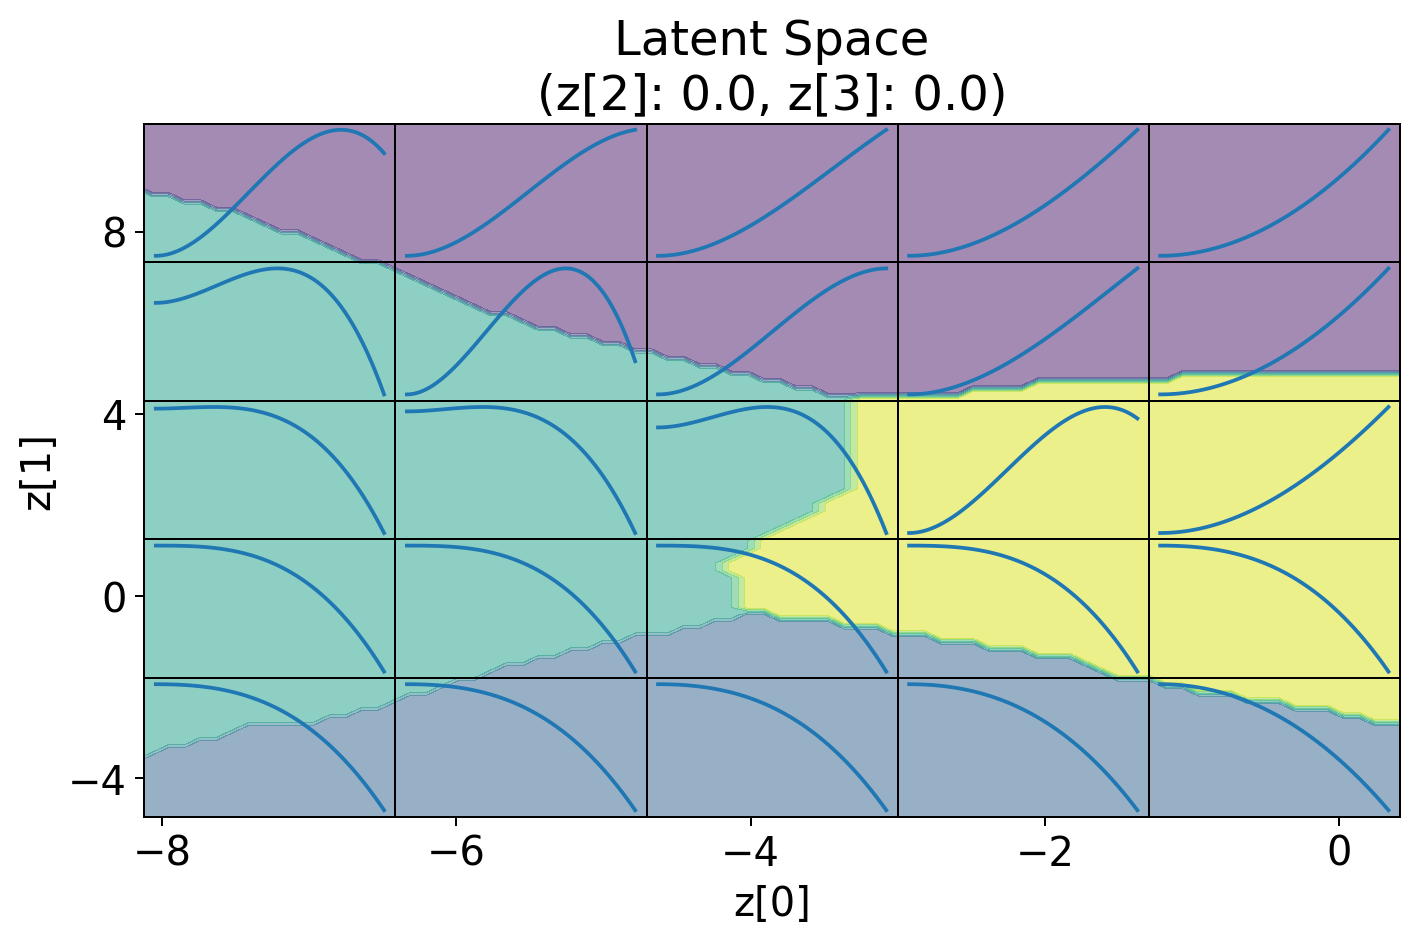

In [17]:
importlib.reload(alvp)

LSE = alvp.LatentSpaceExplorer(
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=1
)

z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
z1 = np.linspace(X_latent[:,1].min()+2,X_latent[:,1].max()-2,5)
fig, axs = LSE.generated_2d(
    generator=UnravelLatentspace(),
    z0=z0, z1=z1,
    zi_f=X_latent.shape[1]-2,
    z0_idx=0, z1_idx=1,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

LSE.plot_dbe(
    X_latent[:,:2], y,
    res=100, k=1,
    ax=axs[-1],
    contourf_kwargs=None,
)

plt.show()

Look at latent dimensions and generated samples (varying 1 latent variable)

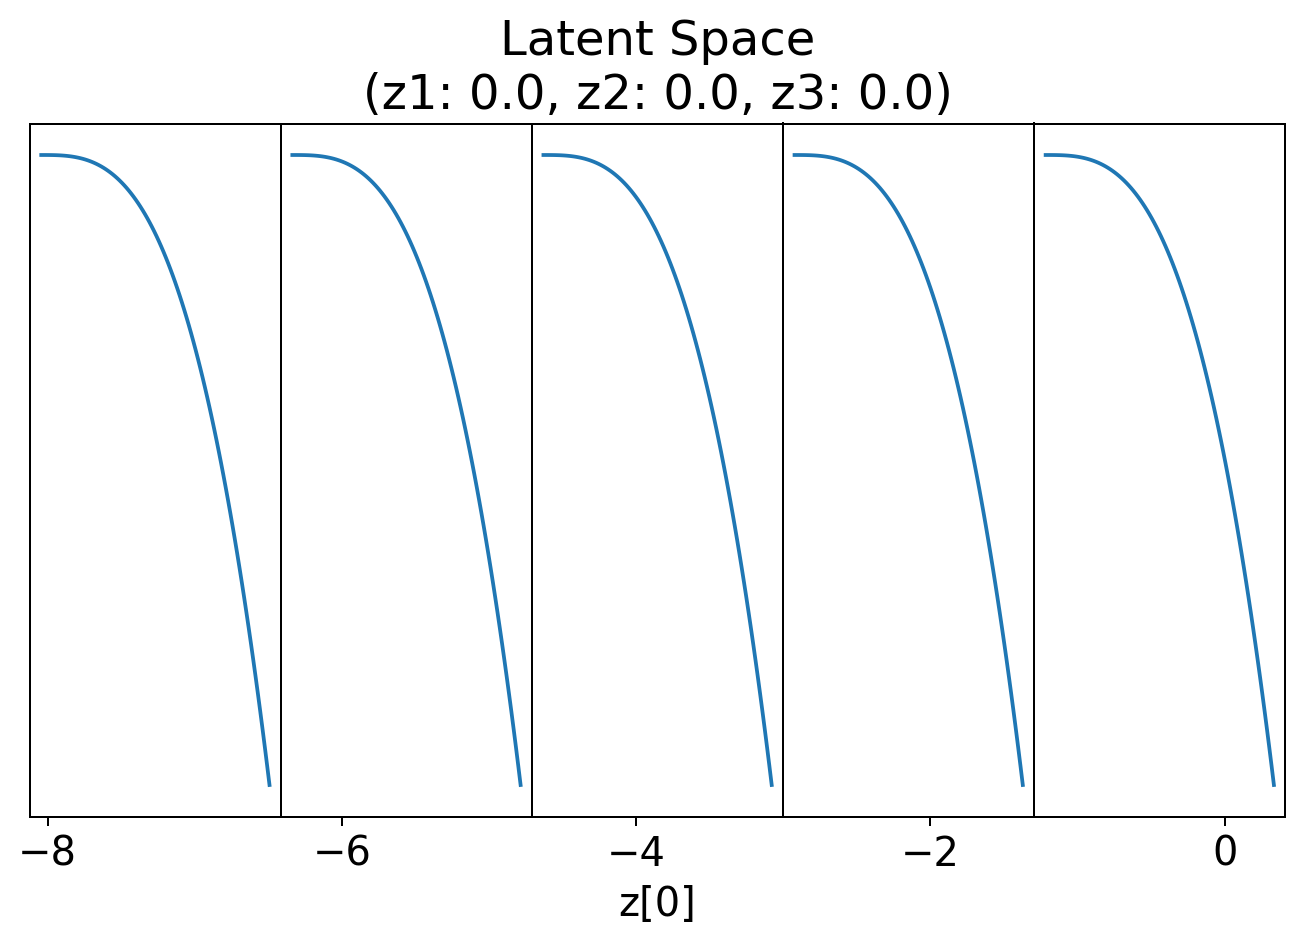

In [18]:
z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
fig, axs = LSE.generated_1d(
    generator=UnravelLatentspace(),
    z0=z0,
    zi_f=X_latent.shape[1]-1,
    z0_idx=0,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

# Corner Plot

Look at pairwise scatter

(100, 4)
[[ 1.          0.36532774 -0.12708345 -0.20178492]
 [ 0.36532774  1.          0.63747578 -0.85371643]
 [-0.12708345  0.63747578  1.         -0.44946293]
 [-0.20178492 -0.85371643 -0.44946293  1.        ]]


/home/lukas/github/astroLuSt/demos/../astroLuSt/visualization/plots.py:2324: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  if idx != 1:
/home/lukas/github/astroLuSt/demos/../astroLuSt/visualization/plots.py:2320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  else:
/home/lukas/github/astroLuSt/demos/../astroLuSt/visualization/plots.py:2320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  else:
/home/lukas/github/astroLuSt/demos/../astroLuSt/visualization/plots.py:2320: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  else:


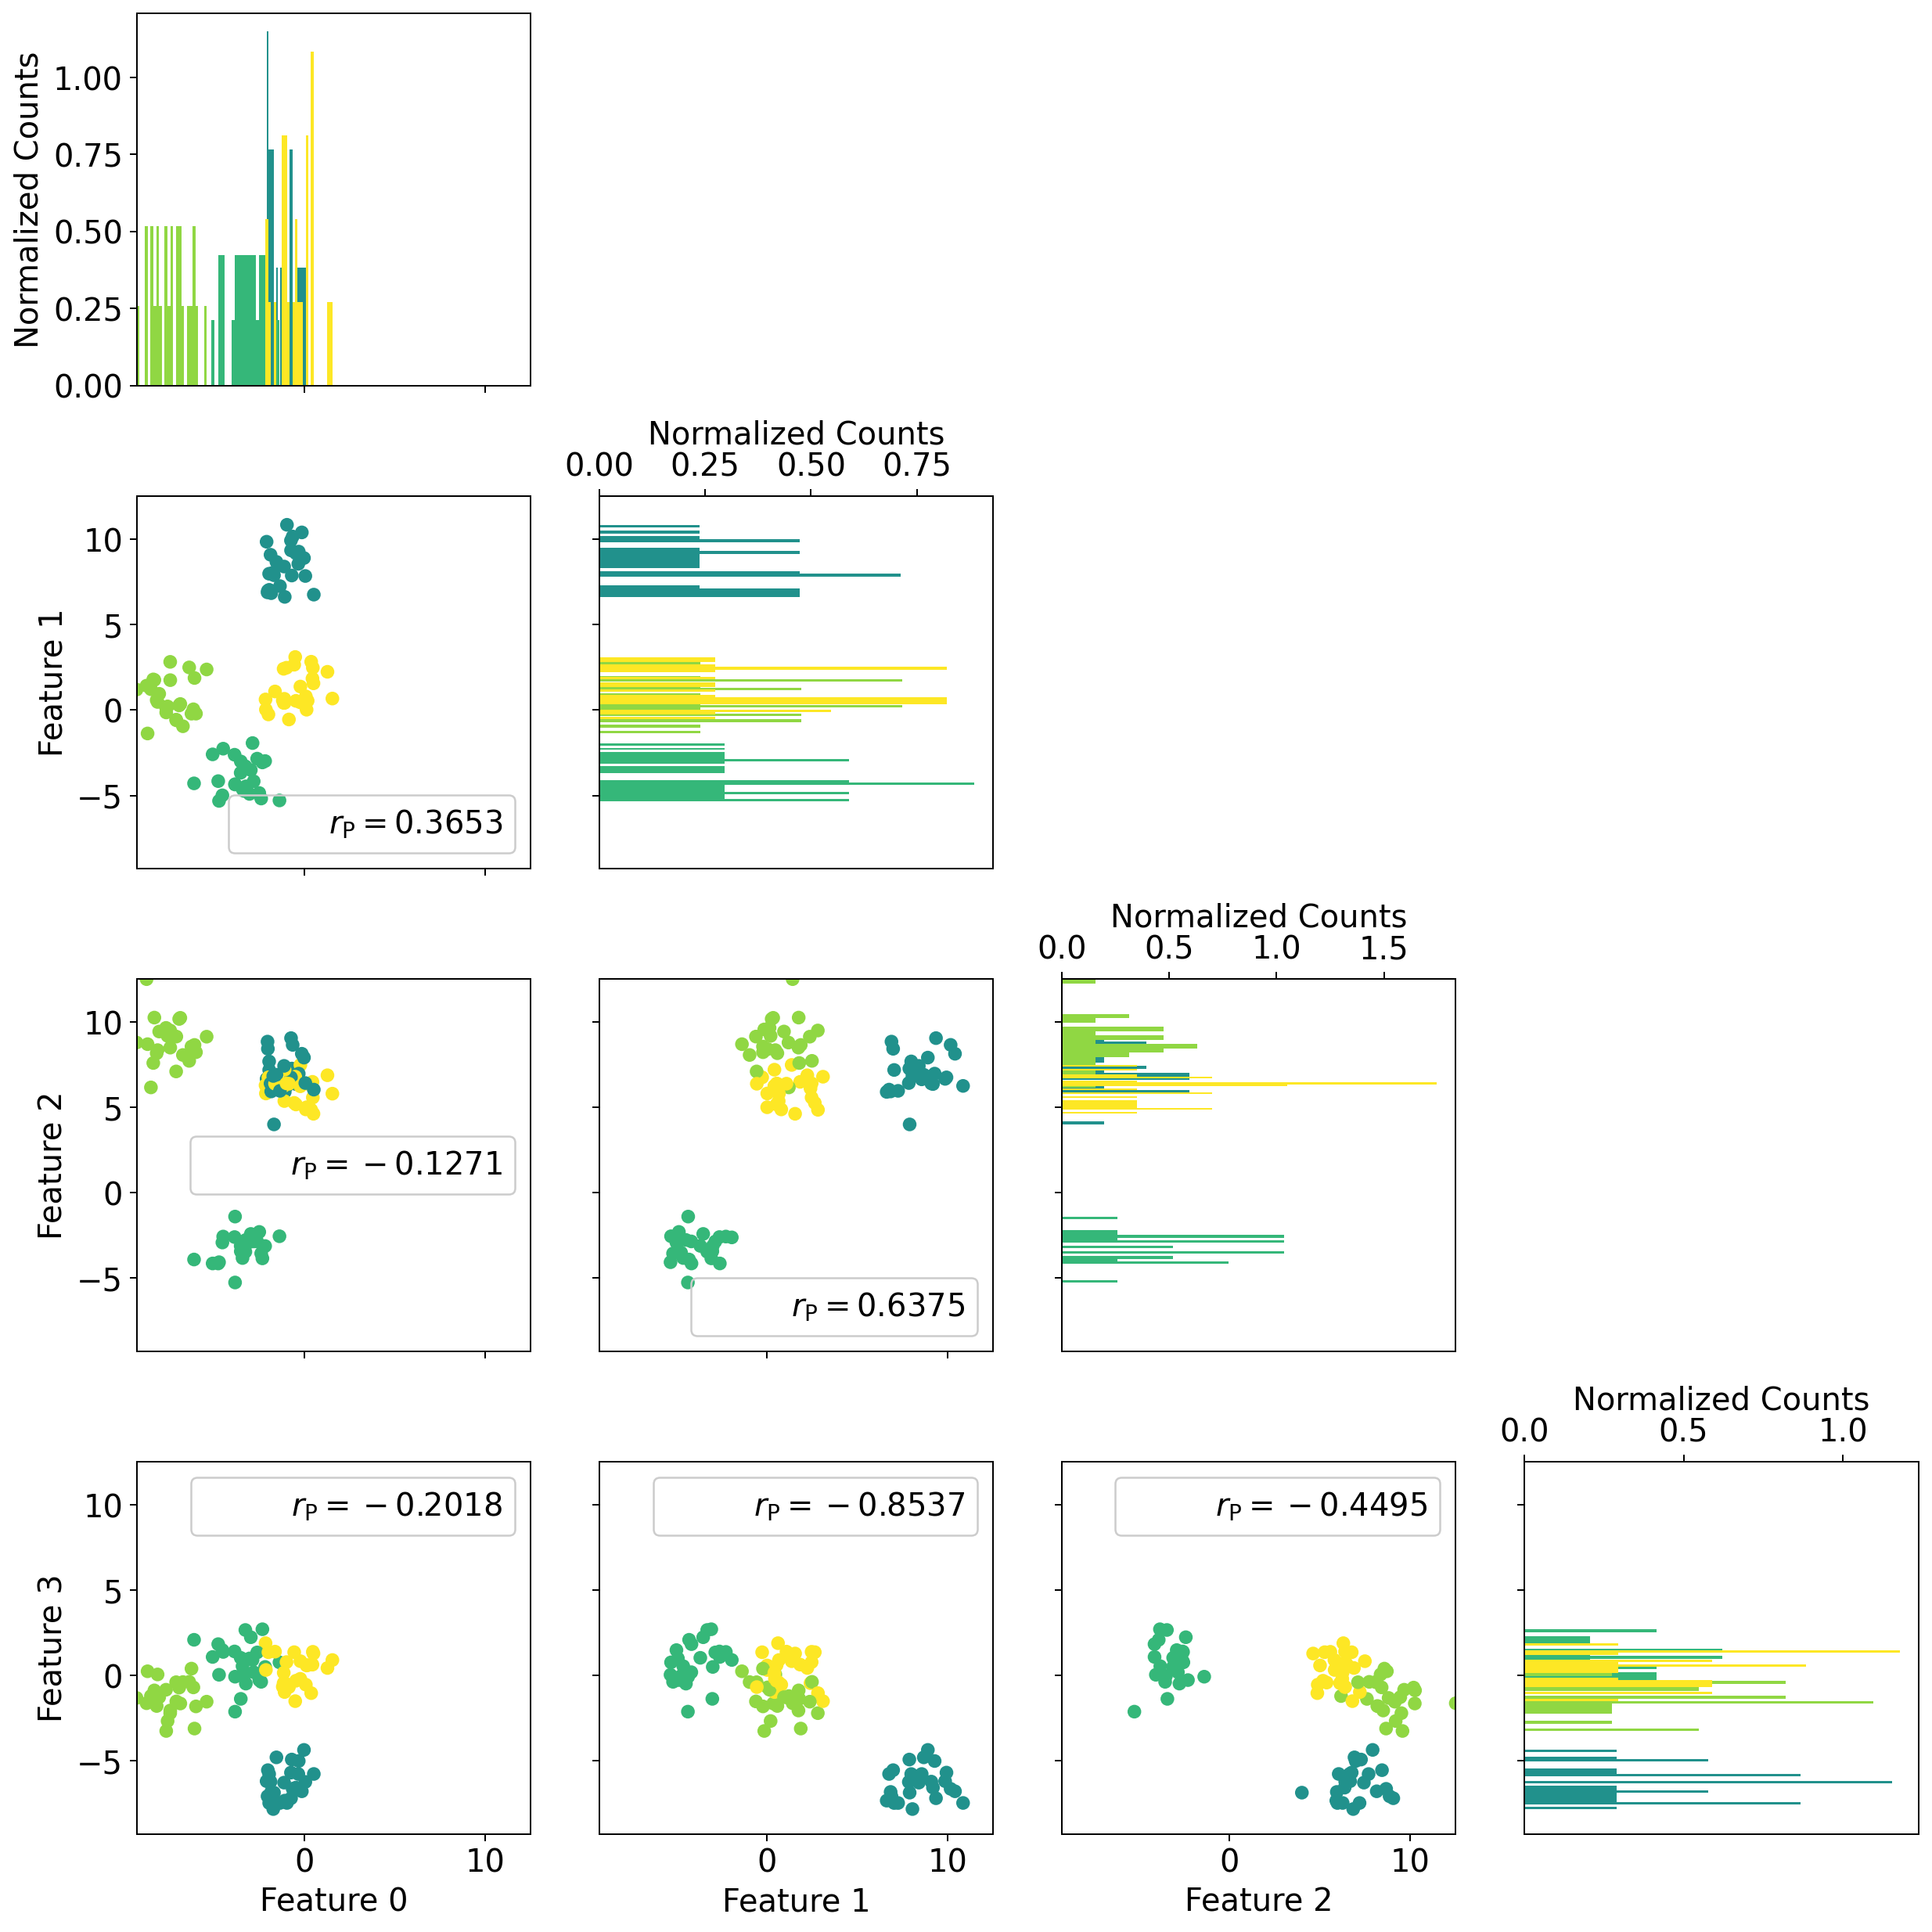

In [67]:
importlib.reload(alvp)


CP = alvp.CornerPlot()

fig = plt.figure(figsize=(14,14))
fig, axs = CP.plot(
    X_latent, y, featurenames=None,
    mus=None, sigmas=None, corrmat=None,
    bins=100,
    cmap='viridis',
    xymin=np.nanmin(X_latent), xymax=np.nanmax(X_latent),
    asstandardnormal=False,
    fig=fig,
    sctr_kwargs={'alpha':1, 'vmin':-3},
    hist_kwargs={'density':True},
)

# Venn Diagram

Visualization of a the following query

\begin{align}
    k_1 \lor (k_2 \land \neg  k_3) \lor (k_4\land k_3)
\end{align}

VennDiagram(
    verbose=2,
)
INFO(VennDiagram.plot): Parsed `query`: (query_array[:,:,3]*query_array[:,:,4])+(query_array[:,:,3]*query_array[:,:,5])+(query_array[:,:,3]*(1-query_array[:,:,6]))


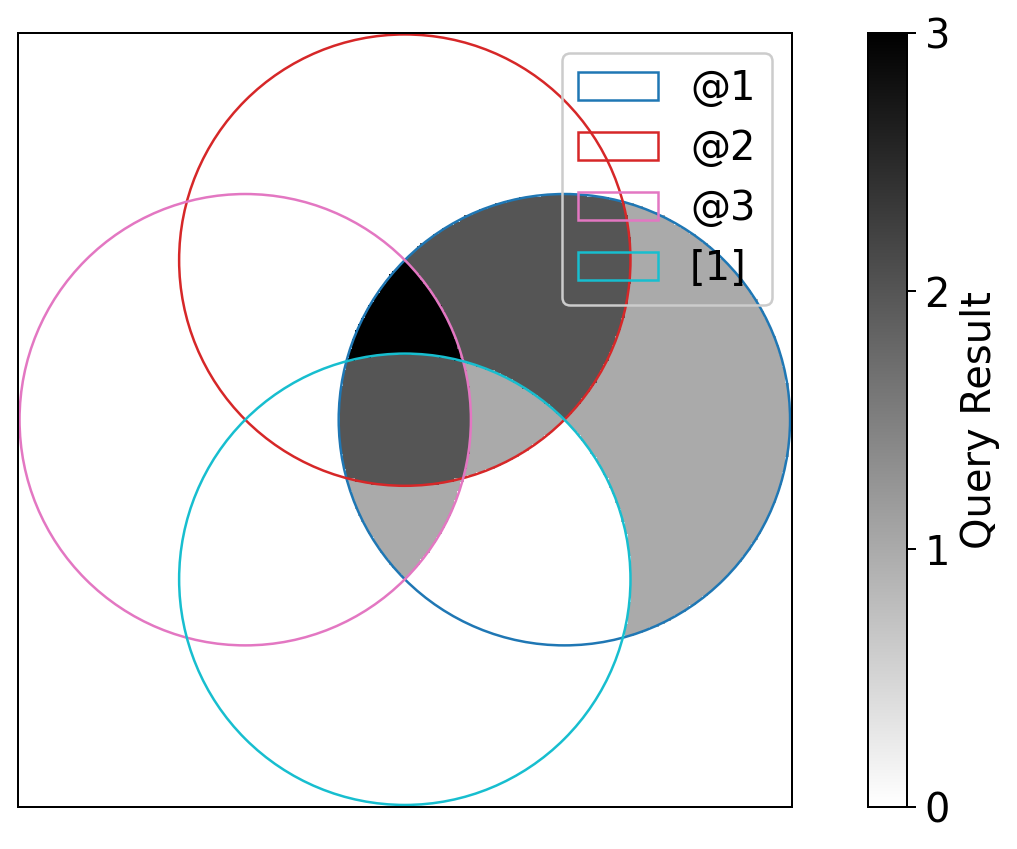

In [10]:
importlib.reload(alvp)

VD = alvp.VennDiagram(verbose=2)

print(VD)

# fig, axs = VD.plot(
#     query='@1|(@2&(~@3))|(@4&@3)',
#     labels=['@1', '@2', '@3'],
#     # pcolormesh_kwargs={'vmax':1}
#     # pcolormesh_kwargs={'vmin':1}
# )
fig, axs = VD.plot(
    query='(@1&@2)|(@1&@3)|(@1&(~@4))',
    labels=['@1', '@2', '@3'],
    # pcolormesh_kwargs={'vmax':1}
    # pcolormesh_kwargs={'vmin':1}
)

plt.show()